# Miniproject - Neuroscience: cellular and circuit mechanisms (BIO-482)

#### Importing libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import os
import sys
import numpy as np
from sklearn.linear_model import LinearRegression 
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns


# Load results from previous parts

In [ ]:
base_path = os.getcwd()
results_path = base_path.replace('notebooks', 'results')

fname = 'result_df_part1.pkl'
result_df_part1 = pd.read_pickle(os.path.join(results_path, fname))

fname = 'result_df_part2.pkl'
result_df_part2 = pd.read_pickle(os.path.join(results_path, fname))

fname = 'result_df_part3.pkl'
result_df_part3 = pd.read_pickle(os.path.join(results_path, fname))

In [ ]:
result_df_part2

In [ ]:
i=7

print(len(result_df_part3['wp_avg'][i]))
print(len(result_df_part3['ap_avg'][i]))
print(len(result_df_part3['vm_avg'][i]))

In [ ]:
len_vm_avg

In [ ]:

import numpy as np
from scipy import interpolate

# Assuming result_df_part3 is your DataFrame and it's already defined
result_df_part3['wp_avg_upsample'] = None  # Create new column

for i in range(len(result_df_part3)):
    x = np.arange(len(result_df_part3.loc[i, 'wp_avg']))
    y = result_df_part3.loc[i, 'wp_avg']
    f = interpolate.interp1d(x, y)

    x_new = np.linspace(0, len(x)-1, len(result_df_part3.loc[i, 'vm_avg']))
    y_new = f(x_new)

    result_df_part3.at[i, 'wp_avg_upsample'] = y_new


In [ ]:
len(result_df_part3['ap_avg'][i])

In [ ]:
i=50

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# ax1.plot(result_df_part3['wp_avg_upsample'][i], color='blue')
# ax1.set_ylabel('wp_avg_upsample', color='blue')
count = 0
ax2 = ax1.twinx()
for i in range(len(result_df_part3)):
    if result_df_part3['cell_type'][i] != 'SST':
        continue
    if count > 3:
        break
    ax2.plot(result_df_part3['vm_avg'][i])
    count=count+1
ax2.set_ylabel('vm_avg', color='red')

# ax3 = ax1.twinx()
# ax3.plot(result_df_part3['ap_avg'][i], color='green')
# ax3.set_ylabel('ap_avg', color='green')

plt.show()

In [ ]:
result_df_part3['wp_avg_upsample_reshape'] = result_df_part3['wp_avg_upsample'].apply(lambda x: np.array(x).reshape(-1, 1))
result_df_part3['ap_avg_reshape'] = result_df_part3['ap_avg'].apply(lambda x: np.array(x).reshape(-1, 1))
result_df_part3['vm_avg_reshape'] = result_df_part3['vm_avg'].apply(lambda x: np.array(x).reshape(-1, 1))

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
result_df_part3['cell_type_encode'] = le.fit_transform(result_df_part3['cell_type'])

In [ ]:
from sklearn.model_selection import train_test_split

features = result_df_part3[['wp_avg_upsample_reshape', 'ap_avg_reshape', 'vm_avg_reshape']]
labels = result_df_part3['cell_type_encode']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
# Convert features and labels to numpy arrays
X = np.stack(result_df_part3[['wp_avg_upsample_reshape', 'ap_avg_reshape', 'vm_avg_reshape']].values)
y = result_df_part3['cell_type_encode'].values

# Reshape X to (n_samples, n_timesteps, n_features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import numpy as np

# Create a 3D array for the features
X = np.array(result_df_part3[['wp_avg_upsample_reshape', 'ap_avg_reshape', 'vm_avg_reshape']].values.tolist())



# Create a 1D array for the labels
y = result_df_part3['cell_type_encode'].values


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# print mean len of result_df_part3['wp_avg_upsample_reshape'] as int
print(int(np.mean(result_df_part3['wp_avg_upsample_reshape'].apply(lambda x: len(x)))))

In [ ]:
# Reshape the input data to have the correct shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

n_timesteps = int(np.mean(result_df_part3['wp_avg_upsample_reshape'].apply(lambda x: len(x))))
n_features = 3
n_classes = 4

# Define the model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Dense(n_classes, activation='softmax'))  # n_classes is the number of classes in your 'cell_type'

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=2, validation_data=(X_test, y_test))


In [ ]:
import keras.layers as L
import keras.models as M

import numpy

# The inputs to the model.
# We will create two data points, just for the example.
data_x = numpy.array([
    # Datapoint 1
    [
        # Input features at timestep 1
        [1, 2, 3],
        # Input features at timestep 2
        [4, 5, 6]
    ],
    # Datapoint 2
    [
        # Features at timestep 1
        [7, 8, 9],
        # Features at timestep 2
        [10, 11, 12]
    ]
])

# The desired model outputs.
# We will create two data points, just for the example.
data_y = numpy.array([
    # Datapoint 1
    [
        # Target features at timestep 1
        [101, 102, 103, 104],
        # Target features at timestep 2
        [105, 106, 107, 108]
    ],
    # Datapoint 2
    [
        # Target features at timestep 1
        [201, 202, 203, 204],
        # Target features at timestep 2
        [205, 206, 207, 208]
    ]
])

# Each input data point has 2 timesteps, each with 3 features.
# So the input shape (excluding batch_size) is (2, 3), which
# matches the shape of each data point in data_x above.
model_input = L.Input(shape=(2, 3))

# This RNN will return timesteps with 4 features each.
# Because return_sequences=True, it will output 2 timesteps, each
# with 4 features. So the output shape (excluding batch size) is
# (2, 4), which matches the shape of each data point in data_y above.
model_output = L.LSTM(4, return_sequences=True)(model_input)

# Create the model.
model = M.Model(inputs=model_input, outputs=model_output)

# You need to pick appropriate loss/optimizers for your problem.
# I'm just using these to make the example compile.
model.compile('sgd', 'mean_squared_error')

# Train
model.fit(data_x, data_y)

In [ ]:
import keras.layers as L
import keras.models as M

import numpy

# The inputs to the model.
# We will create two data points, just for the example.
data_x = numpy.array([
    # Datapoint 1
    [
        # Input features at timestep 1
        [1, 2, 3],
        # Input features at timestep 2
        [4, 5, 6]
    ],
    # Datapoint 2
    [
        # Features at timestep 1
        [7, 8, 9],
        # Features at timestep 2
        [10, 11, 12]
    ]
])

# The desired model outputs.
# We will create two data points, just for the example.
data_y = numpy.array([
    # Datapoint 1
    # Target features at timestep 2
    [105],
    # Datapoint 2
    # Target features at timestep 2
    [205]
])


# For data_x, stack the 'vm_avg', 'ap_avg', and 'wm_avg_upsample' columns 
data_x = np.array([np.stack((row['vm_avg'], row['ap_avg'], row['wp_avg_upsample']), axis=1) for _, row in result_df_part3.iterrows()])

# For data_y, use the 'cell_type_encode' column
data_y = result_df_part3['cell_type_encode'].values.reshape(-1, 1)


# Each input data point has 2 timesteps, each with 3 features.
# So the input shape (excluding batch_size) is (2, 3), which
# matches the shape of each data point in data_x above.
model_input = L.Input(shape=(8000, 3))

# This RNN will return timesteps with 4 features each.
# Because return_sequences=False, it will output 2 timesteps, each
# with 4 features. So the output shape (excluding batch size) is
# (2, 4), which matches the shape of each data point in data_y above.
model_output = L.LSTM(4, return_sequences=False)(model_input)

# Create the model.
model = M.Model(inputs=model_input, outputs=model_output)

# You need to pick appropriate loss/optimizers for your problem.
# I'm just using these to make the example compile.
model.compile('sgd', 'mean_squared_error')

# Train
model.fit(data_x, data_y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming each of the 134 datapoints has 8000 timesteps and 3 features
input_shape = (8000, 3)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=input_shape))
model.add(Dense(4, activation='softmax'))  # 4 groups: EXC, VIP, VP, SST

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming `X_train` is your (134, 8000, 3) feature matrix and `y_train` are your labels
model.fit(data_x, data_y, epochs=10, verbose=1)


# part 2

In [ ]:
sweep_type = 'free whisking'

pre_window = 0.5 # time before whisking onset (s)
post_window = 0.5 # time after whisking onset (s)
min_event_dur = 0.2 # minimal duration of whisking episode to be considered
min_iti = 0.5 # minimal intertrial interval (ITI) between 2 consecutive whisking episode (s)
min_number_trials = 2 # minimal number of trial
bin_size = 0.05 # bin size for psth (s)
epoch_bounds = {'pre':[-0.5, -0.3],
                  'post':[0,0.2]}  # time boundaries to compute changes in whisker protraction (WP), or Vm

In [ ]:
class_color = {'EXC':'k',
               'PV':'indianred',
               'VIP':'royalblue',
               'SST':'darkorange'} 
cell_class_order = ['EXC', 'PV', 'VIP', 'SST']

In [ ]:
sr_wp = 100

In [ ]:
# Parameters for plotting and baseline calculation
time_before = -0.5
baseline_bounds = [-0.5, -0.2] 

#Define 1x4 plot to show each cell type
fig, axs = plt.subplots(1,4, figsize=(12,3), dpi=200,
                       sharey=True)
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
#Define a time vector for plotting
time = np.arange((pre_window + post_window)*sr_wp) / sr_wp - pre_window #note sampling rate!

#Iterate over cell types
for idx, cell_type in enumerate(cell_class_order):
    
    # Make array with cell-type-specific data
    arr_cell_type = np.stack(result_df_part2[result_df_part2.cell_type==cell_type]['wp_avg'].values,axis=1)

    # Remove baseline (=average signal before event onset) from mean signal
    bound_1 = (baseline_bounds[0]-time_before)*sr_wp
    bound_2 = (baseline_bounds[1]-time_before)*sr_wp-1
    baseline_arr = np.nanmean(arr_cell_type[int(bound_1):int(bound_2)], axis=0) #a scalar
    arr_cell_type = arr_cell_type - baseline_arr #substract baseline value to all cells
    
   
    # Get mean (across cells) event-triggered trial-averaged signal, and SEM
    mean = np.nanmean(arr_cell_type, axis=1)
    n_cells = arr_cell_type.shape[1]
    sem = np.nanstd(arr_cell_type, axis=1) / np.sqrt(n_cells) #formula of standard error of the mean
    
    # Plot mean and confidence interval
    axs[idx].plot(time, np.nanmean(arr_cell_type, axis=1), color=class_color[cell_type])
    axs[idx].fill_between(time,
                          y1=mean-sem, 
                          y2=mean+sem,
                          color=class_color[cell_type],
                          alpha=0.1,
                          edgecolor=None)
    
    #Add additional information
    axs[idx].axvline(0, ls='--', c='dimgray')
    axs[idx].axhline(0, ls='--', c='dimgray')
    axs[idx].set_title(r'{} ($n={}$)'.format(cell_type, n_cells))
    axs[idx].set_ylabel('Whisker angle (deg)')
    axs[idx].set_xlabel('Time (s)')
                  
        
# Custom
plt.tight_layout()

plt.show()
# Save figure
# fname = os.path.join(figure_path, '9_WhiskOnset_GRD_AVG_WhiskerAngle.png')
# plt.savefig(fname=fname, dpi='figure', format='png', bbox_inches='tight')

In [ ]:
df = result_df_part2.filter(regex='avg|cell_type')

In [ ]:

for _, row in df.iterrows():
    print(len(row['vm_avg']), len(row['ap_avg']), len(row['wp_avg']))
    # np.column_stack([row['vm_avg'], row['ap_avg'], row['wp_avg']])

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# Angenommen, df ist Ihr DataFrame
# copy result_df_part2 to df but only keep the columns that end with 'avg' and 'cell_type'
df = result_df_part2.filter(regex='avg|cell_type')


# Konvertieren Sie die Kategorien in numerische Werte
encoder = LabelEncoder()
encoder.fit(df['cell_type'])
encoded_Y = encoder.transform(df['cell_type'])

# Konvertieren Sie numerische Werte in One-Hot-Vektoren
dummy_y = np_utils.to_categorical(encoded_Y)

# Erstellen Sie eine Liste von Sequenzen
sequences = [np.column_stack([row['vm_avg'], row['ap_avg']]) for _, row in df.iterrows()]

# Konvertieren Sie die Liste in ein Numpy-Array
X = np.array(sequences)

# Erstellen Sie das Modell
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(dummy_y.shape[1], activation='softmax'))

# Kompilieren Sie das Modell
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trainieren Sie das Modell
model.fit(X, dummy_y, epochs=10, batch_size=32)


In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
for _, row in train.iterrows():
    print(len(row['vm_avg']), len(row['ap_avg']), len(row['wp_avg']))
    # np.column_stack([row['vm_avg'], row['ap_avg'], row['wp_avg']])

In [ ]:
# stretch the array in df[wp_avg] to the same length as df[vm_avg] and df[ap_avg]
for _, row in train.iterrows():
    row['wp_avg'] = np.pad(row['wp_avg'], (0, len(row['vm_avg']) - len(row['wp_avg'])), 'constant', constant_values=np.nan)

for _, row in test.iterrows():
    row['wp_avg'] = np.pad(row['wp_avg'], (0, len(row['vm_avg']) - len(row['wp_avg'])), 'constant', constant_values=np.nan)


        


In [ ]:
len(row['vm_avg'])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd

df = result_df_part2.filter(regex='avg|cell_type')

# Extrahieren Sie die Merkmale und Labels aus dem DataFrame
potential_verlauf = df['wp_avg'].values
firing_rate = df['ap_avg'].values
stimulus_signal = df['wp_avg'].values
labels = df['cell_type'].values  # EXC, VIP, VP, SST

# Kombinieren Sie Ihre Merkmale in einem einzigen Array
X = np.stack((potential_verlauf, firing_rate, stimulus_signal), axis=-1)

# Umformen der Daten für das LSTM (Samples, Time Steps, Features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Erstellen Sie das Modell
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Trainieren Sie das Modell
model.fit(X, labels, epochs=50, batch_size=72, verbose=0)

# Jetzt können Sie das Modell verwenden, um Vorhersagen auf neuen Daten zu treffen
# z.B. model.predict(new_data)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv1D, LSTM, Concatenate
from tensorflow.keras.models import Model


df = result_df_part2.filter(regex='avg|cell_type')

# Convert lists to numpy arrays
wp_avg = np.array(df['wp_avg'].tolist())
vm_avg = np.array(df['vm_avg'].tolist())
ap_avg = np.array(df['ap_avg'].tolist())

# Define input layers
wp_input = Input(shape=(wp_avg.shape[1], 1), name='wp_input')
vm_input = Input(shape=(vm_avg.shape[1], 1), name='vm_input')
ap_input = Input(shape=(ap_avg.shape[1], 1), name='ap_input')

# CNN branch for voltage signal
cnn_wp = Conv1D(filters=16, kernel_size=3, activation='relu')(wp_input)
cnn_wp = LSTM(32)(cnn_wp)

# RNN branch for firing rate signal
rnn_vm = LSTM(32)(vm_input)

# Fully connected layer for angle signal
dense_ap = Dense(16, activation='relu')(ap_input)

# Concatenate branches
merged = Concatenate()([cnn_wp, rnn_vm, dense_ap])

# Output layer (adjust units based on your number of classes)
output = Dense(4, activation='softmax', name='output')(merged)

# Create the model
model = Model(inputs=[wp_input, vm_input, ap_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


## Part 1

In [ ]:
result_df_part1

In [ ]:

# Assuming your data is in a pandas DataFrame df
df = result_df_part1.dropna()

# Split the data into features and target variable
X = df.drop(['cell_id', 'cell_type'], axis=1)
y = df['cell_type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the cell types for the test set
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

df = result_df_part3.copy()
df.dropna(inplace=True)

# drop all columns that are not numeric, but keep cell_id and cell_type
df = df.select_dtypes(include=np.number)
df['cell_id'] = result_df_part2['cell_id']
df['cell_type'] = result_df_part2['cell_type']

# Split the data into features and target variable
X = df.drop(['cell_id', 'cell_type'], axis=1).values
y = pd.get_dummies(df['cell_type']).values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 16)  # Add another layer with 32 units
        self.fc3 = nn.Linear(16, y_train.shape[1])  # Adjust the output layer accordingly

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))  # Apply activation function to the added layer
        x = self.fc3(x)
        return x

# Create the network
net = Net()

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
for epoch in range(500):  # loop over the dataset multiple times
    running_loss = 0.0
    for i in range(X_train.shape[0]):
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(X_train[i])
        loss = criterion(outputs, y_train[i])
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, loss: {running_loss / X_train.shape[0]}')

print('Finished Training')

# Test the network
correct = 0
total = 0
with torch.no_grad():
    outputs = net(X_test)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test.size(0)
    # correct += (predicted == y_test).sum().item()

    # Convert one-hot encoded targets to indices
    y_test_indices = torch.argmax(y_test, dim=1)

    # Calculate correct predictions
    correct += (predicted == y_test_indices).sum().item()

print(f'Accuracy of the network on the test data: {100 * correct / total}%')




# SO jetzt aber CLASSIFIER TEST

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import os
import sys
import numpy as np
from sklearn.linear_model import LinearRegression 
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
base_path = os.getcwd()
results_path = base_path.replace('notebooks', 'results')

fname = 'result_df_part1.pkl'
result_df_part1 = pd.read_pickle(os.path.join(results_path, fname))

fname = 'result_df_part2.pkl'
result_df_part2 = pd.read_pickle(os.path.join(results_path, fname))

fname = 'result_df_part3.pkl'
result_df_part3 = pd.read_pickle(os.path.join(results_path, fname))

In [4]:
# # add results_df_part1 to results_df_part2 and save as results_df_part12, they have the same cell_id and cell_type column
# result_df_part12 = pd.concat([result_df_part2, result_df_part1], ignore_index=True)


# append result_df_part2 to result_df_part3 df and save as result_df_part23
result_df_part23 = pd.concat([result_df_part3, result_df_part2], ignore_index=True)

In [23]:
# Assuming your data is in a pandas DataFrame df
df = result_df_part23.filter(regex='pre|post|delta|cell_type')
# df = result_df_part1.drop(['cell_id'], axis=1)
# df = result_df_part12.drop(['cell_id'], axis=1)
df = df.dropna()

# Split the data into features and target variable
X = df.drop(['cell_type'], axis=1)
y = df['cell_type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=1000),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000),
    "Neural Net": MLPClassifier(alpha = 1),
    "Naive Bayes": GaussianNB(),
    # "AdaBoost": AdaBoostClassifier(),
    # "QDA": QuadraticDiscriminantAnalysis(),
    # "Gaussian Process": GaussianProcessClassifier()
}

In [ ]:
def batch_classify(X_train, Y_train, X_test, Y_test, no_classifiers = 5, verbose = True):
    """
    This method, takes as input the X, Y matrices of the Train and Test set.
    And fits them on all of the Classifiers specified in the dict_classifier.
    The trained models, and accuracies are saved in a dictionary. The reason to use a dictionary
    is because it is very easy to save the whole dictionary with the pickle module.
    
    Usually, the SVM, Random Forest and Gradient Boosting Classifier take quiet some time to train. 
    So it is best to train them on a smaller dataset first and 
    decide whether you want to comment them out or not based on the test accuracy score.
    """
    
    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.perf_counter()
        classifier.fit(X_train, Y_train)
        t_end = time.perf_counter()
        
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        test_score = classifier.score(X_test, Y_test)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff}
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))
    return dict_models



def display_dict_models(dict_models, sort_by='test_score'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),4)), columns = ['classifier', 'train_score', 'test_score', 'train_time'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))

In [24]:
dict_models = batch_classify(X_train, y_train, X_test, y_test, no_classifiers = 8, verbose=False)
display_dict_models(dict_models)

c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kons\AppData\Local\Temp\ipykernel_17592\3564092800.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Logistic Regression' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_.loc[ii, 'classifier'] = cls[ii]


,classifier,train_score,test_score,train_time
3,Gradient Boosting Classifier,1.000000,0.798165,19.033181
5,Random Forest,1.000000,0.770642,3.738839
1,Nearest Neighbors,0.825397,0.761468,0.004460
6,Neural Net,0.805556,0.761468,0.233128
0,Logistic Regression,0.718254,0.724771,0.028359
4,Decision Tree,1.000000,0.706422,0.007369
7,Naive Bayes,0.694444,0.706422,0.005598
2,Linear SVM,0.591270,0.522936,0.009087


For (100, 0.5, frie) - train, test score: 	 1.00000 	-	 0.77064
For (100, 0.5, squa) - train, test score: 	 1.00000 	-	 0.75229
For (100, 0.1, frie) - train, test score: 	 1.00000 	-	 0.77982
For (100, 0.1, squa) - train, test score: 	 1.00000 	-	 0.77982
For (100, 0.01, frie) - train, test score: 	 0.90079 	-	 0.72477
For (100, 0.01, squa) - train, test score: 	 0.90079 	-	 0.72477
For (100, 0.001, frie) - train, test score: 	 0.43254 	-	 0.39450
For (100, 0.001, squa) - train, test score: 	 0.43254 	-	 0.39450
For (500, 0.5, frie) - train, test score: 	 1.00000 	-	 0.77064
For (500, 0.5, squa) - train, test score: 	 1.00000 	-	 0.76147
For (500, 0.1, frie) - train, test score: 	 1.00000 	-	 0.79817
For (500, 0.1, squa) - train, test score: 	 1.00000 	-	 0.76147
For (500, 0.01, frie) - train, test score: 	 0.99206 	-	 0.77064
For (500, 0.01, squa) - train, test score: 	 0.99206 	-	 0.77064
For (500, 0.001, frie) - train, test score: 	 0.85317 	-	 0.70642
For (500, 0.001, squa) - train

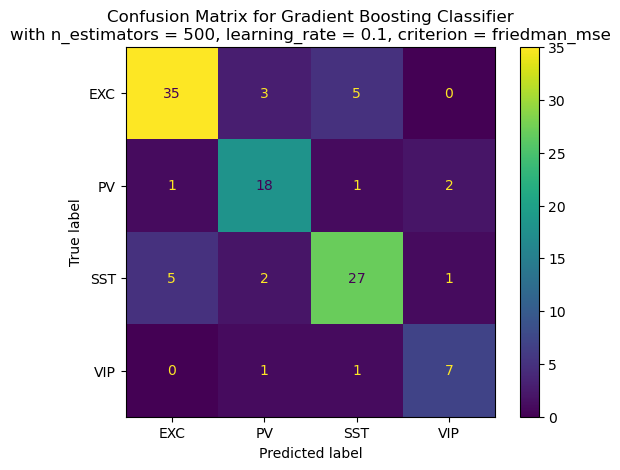

For (1000, 0.1, frie) - train, test score: 	 1.00000 	-	 0.79817
Classification Report:
              precision    recall  f1-score   support

         EXC       0.88      0.81      0.84        43
          PV       0.72      0.82      0.77        22
         SST       0.79      0.77      0.78        35
         VIP       0.70      0.78      0.74         9

    accuracy                           0.80       109
   macro avg       0.77      0.80      0.78       109
weighted avg       0.80      0.80      0.80       109

Feature Importances:
Importance of feature 0: 0.07888821015118415
Importance of feature 1: 0.11722498019890687
Importance of feature 2: 0.06760747546871841
Importance of feature 3: 0.0793008378191484
Importance of feature 4: 0.13512689465655436
Importance of feature 5: 0.28531038649708523
Importance of feature 6: 0.048124381792401236
Importance of feature 7: 0.15276501451751942
Importance of feature 8: 0.03565181889848188


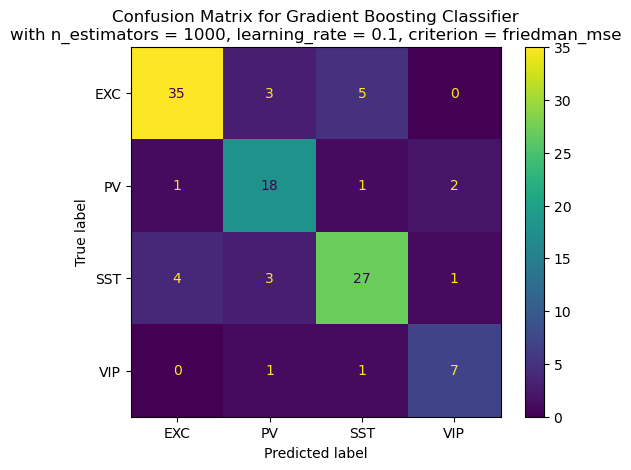

In [25]:
GDB_params = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.5, 0.1, 0.01, 0.001],
    'criterion': ['friedman_mse', 'squared_error']
}

best_GDB_test_score = 0

best_GDB_params = {
    'n_estimators': [],
    'learning_rate': [],
    'criterion': []
}

best_GDB_clfs = []

for n_est in GDB_params['n_estimators']:
    for lr in GDB_params['learning_rate']:
        for crit in GDB_params['criterion']:
            clf = GradientBoostingClassifier(n_estimators=n_est, 
                                             learning_rate = lr,
                                             criterion = crit)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            test_score = clf.score(X_test, y_test)
            print("For ({}, {}, {}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(n_est, lr, crit[:4], train_score, test_score))

            if test_score > best_GDB_test_score:
                best_GDB_test_score = test_score
                best_GDB_params['n_estimators'] = [n_est]
                best_GDB_params['learning_rate'] = [lr]
                best_GDB_params['criterion'] = [crit]
                best_GDB_clfs = [clf]
            elif test_score == best_GDB_test_score:
                best_GDB_params['n_estimators'].append(n_est)
                best_GDB_params['learning_rate'].append(lr)
                best_GDB_params['criterion'].append(crit)
                best_GDB_clfs.append(clf)

print("--------------------------------------------------------")
print("Best test score: {:.5f}".format(best_GDB_test_score))
for i in range(len(next(iter(best_GDB_params.values())))):
    n_est = best_GDB_params['n_estimators'][i]
    lr = best_GDB_params['learning_rate'][i]
    crit = best_GDB_params['criterion'][i]
    clf = best_GDB_clfs[i]

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For ({}, {}, {}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(n_est, lr, crit[:4], train_score, test_score))

    # Predict the test set results
    y_pred = clf.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Feature Importances:")
    # Get feature importances
    importances = clf.feature_importances_

    # Print the feature importances
    for i in range(len(importances)):
        print(f"Importance of feature {i}: {importances[i]}")

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for Gradient Boosting Classifier\nwith n_estimators = {n_est}, learning_rate = {lr}, criterion = {crit}')
    plt.show()




For (100, None, 2) - train, test score: 	 1.00000 	-	 0.72477
For (100, None, 5) - train, test score: 	 1.00000 	-	 0.75229
For (100, None, 10) - train, test score: 	 0.94048 	-	 0.77064
For (100, 10, 2) - train, test score: 	 1.00000 	-	 0.74312
For (100, 10, 5) - train, test score: 	 0.98810 	-	 0.77064
For (100, 10, 10) - train, test score: 	 0.93651 	-	 0.76147
For (100, 20, 2) - train, test score: 	 1.00000 	-	 0.74312
For (100, 20, 5) - train, test score: 	 1.00000 	-	 0.75229
For (100, 20, 10) - train, test score: 	 0.93254 	-	 0.76147
For (100, 30, 2) - train, test score: 	 1.00000 	-	 0.74312
For (100, 30, 5) - train, test score: 	 0.99206 	-	 0.75229
For (100, 30, 10) - train, test score: 	 0.93651 	-	 0.75229
For (500, None, 2) - train, test score: 	 1.00000 	-	 0.77982
For (500, None, 5) - train, test score: 	 0.99603 	-	 0.75229
For (500, None, 10) - train, test score: 	 0.93651 	-	 0.75229
For (500, 10, 2) - train, test score: 	 1.00000 	-	 0.77064
For (500, 10, 5) - trai

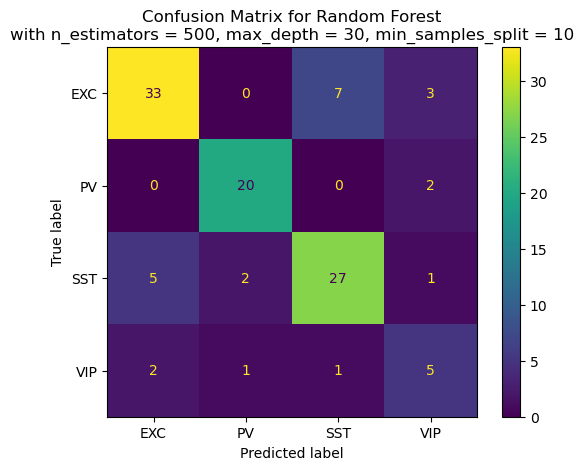

In [26]:
RF_params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

best_RF_test_score = 0

best_RF_params = {
    'n_estimators': [],
    'max_depth': [],
    'min_samples_split': []
}

best_RF_clfs = []

for n_est in RF_params['n_estimators']:
    for max_d in RF_params['max_depth']:
        for min_split in RF_params['min_samples_split']:
            clf = RandomForestClassifier(n_estimators=n_est, 
                                         max_depth=max_d,
                                         min_samples_split=min_split)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            test_score = clf.score(X_test, y_test)
            print("For ({}, {}, {}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(n_est, max_d, min_split, train_score, test_score))

            if test_score > best_RF_test_score:
                best_RF_test_score = test_score
                best_RF_params['n_estimators'] = [n_est]
                best_RF_params['max_depth'] = [max_d]
                best_RF_params['min_samples_split'] = [min_split]
                best_RF_clfs = [clf]
            elif test_score == best_RF_test_score:
                best_RF_params['n_estimators'].append(n_est)
                best_RF_params['max_depth'].append(max_d)
                best_RF_params['min_samples_split'].append(min_split)
                best_RF_clfs.append(clf)

print("--------------------------------------------------------")
print("Best test score: {:.5f}".format(best_RF_test_score))
for i in range(len(next(iter(best_RF_params.values())))):
    n_est = best_RF_params['n_estimators'][i]
    lr = best_RF_params['max_depth'][i]
    crit = best_RF_params['min_samples_split'][i]
    clf = best_RF_clfs[i]

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For ({}, {}, {}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(n_est, max_d, min_split, train_score, test_score))

    # Predict the test set results
    y_pred = clf.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Feature Importances:")
    # Get feature importances
    importances = clf.feature_importances_

    # Print the feature importances
    for i in range(len(importances)):
        print(f"Importance of feature {i}: {importances[i]}")

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for Random Forest\nwith n_estimators = {n_est}, max_depth = {max_d}, min_samples_split = {min_split}')
    plt.show()


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((50,), identity, lbfgs) - train, test score: 	 0.71429 	-	 0.72477
For ((50,), identity, sgd) - train, test score: 	 0.68254 	-	 0.64220
For ((50,), identity, adam) - train, test score: 	 0.73016 	-	 0.66055


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((50,), logistic, lbfgs) - train, test score: 	 0.78175 	-	 0.76147


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For ((50,), logistic, sgd) - train, test score: 	 0.70238 	-	 0.69725


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For ((50,), logistic, adam) - train, test score: 	 0.76587 	-	 0.79817


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((50,), tanh, lbfgs) - train, test score: 	 0.77381 	-	 0.76147
For ((50,), tanh, sgd) - train, test score: 	 0.67857 	-	 0.59633


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For ((50,), tanh, adam) - train, test score: 	 0.80159 	-	 0.73394


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((50,), relu, lbfgs) - train, test score: 	 0.82540 	-	 0.77982
For ((50,), relu, sgd) - train, test score: 	 0.74206 	-	 0.70642


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For ((50,), relu, adam) - train, test score: 	 0.77778 	-	 0.71560


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((100,), identity, lbfgs) - train, test score: 	 0.71429 	-	 0.72477
For ((100,), identity, sgd) - train, test score: 	 0.62698 	-	 0.58716
For ((100,), identity, adam) - train, test score: 	 0.72619 	-	 0.67890


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((100,), logistic, lbfgs) - train, test score: 	 0.82143 	-	 0.73394


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For ((100,), logistic, sgd) - train, test score: 	 0.71032 	-	 0.66055


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For ((100,), logistic, adam) - train, test score: 	 0.79365 	-	 0.79817


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((100,), tanh, lbfgs) - train, test score: 	 0.80952 	-	 0.70642
For ((100,), tanh, sgd) - train, test score: 	 0.73413 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For ((100,), tanh, adam) - train, test score: 	 0.82143 	-	 0.78899


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((100,), relu, lbfgs) - train, test score: 	 0.81746 	-	 0.78899
For ((100,), relu, sgd) - train, test score: 	 0.71825 	-	 0.62385
For ((100,), relu, adam) - train, test score: 	 0.81746 	-	 0.76147


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((200,), identity, lbfgs) - train, test score: 	 0.72222 	-	 0.71560
For ((200,), identity, sgd) - train, test score: 	 0.64683 	-	 0.62385
For ((200,), identity, adam) - train, test score: 	 0.71032 	-	 0.67890


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((200,), logistic, lbfgs) - train, test score: 	 0.88889 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For ((200,), logistic, sgd) - train, test score: 	 0.73016 	-	 0.69725


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


For ((200,), logistic, adam) - train, test score: 	 0.82937 	-	 0.77064


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((200,), tanh, lbfgs) - train, test score: 	 0.86905 	-	 0.72477
For ((200,), tanh, sgd) - train, test score: 	 0.75397 	-	 0.74312
For ((200,), tanh, adam) - train, test score: 	 0.84921 	-	 0.77982


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


For ((200,), relu, lbfgs) - train, test score: 	 0.81746 	-	 0.75229
For ((200,), relu, sgd) - train, test score: 	 0.72619 	-	 0.75229
For ((200,), relu, adam) - train, test score: 	 0.79762 	-	 0.77982
--------------------------------------------------------
Best test score: 0.79817
For ((50,), logistic, adam) - train, test score: 	 0.76587 	-	 0.79817
Classification Report:
              precision    recall  f1-score   support

         EXC       0.88      0.86      0.87        43
          PV       0.69      0.91      0.78        22
         SST       0.77      0.77      0.77        35
         VIP       1.00      0.33      0.50         9

    accuracy                           0.80       109
   macro avg       0.84      0.72      0.73       109
weighted avg       0.82      0.80      0.79       109



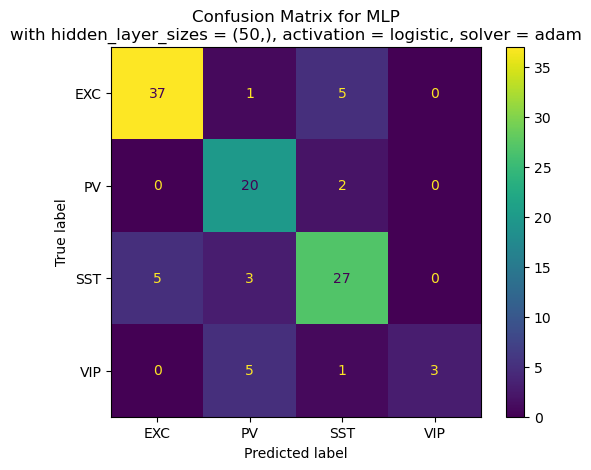

For ((100,), logistic, adam) - train, test score: 	 0.79365 	-	 0.79817
Classification Report:
              precision    recall  f1-score   support

         EXC       0.85      0.81      0.83        43
          PV       0.76      0.86      0.81        22
         SST       0.75      0.77      0.76        35
         VIP       0.86      0.67      0.75         9

    accuracy                           0.80       109
   macro avg       0.81      0.78      0.79       109
weighted avg       0.80      0.80      0.80       109



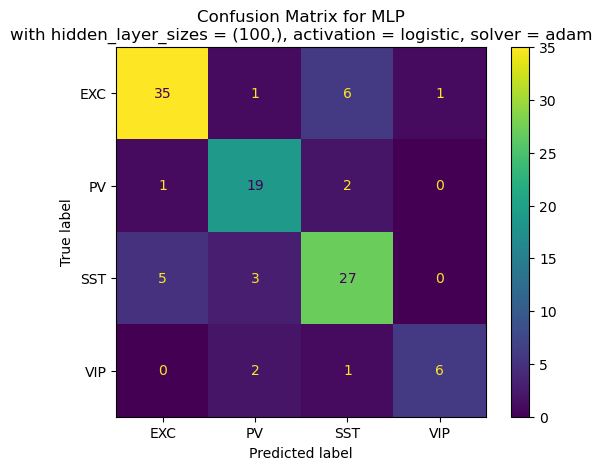

In [27]:
from sklearn.neural_network import MLPClassifier

MLP_params = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam']
}

best_MLP_test_score = 0

best_MLP_params = {
    'hidden_layer_sizes': [],
    'activation': [],
    'solver': []
}

best_MLP_clfs = []

for hls in MLP_params['hidden_layer_sizes']:
    for act in MLP_params['activation']:
        for sol in MLP_params['solver']:
            clf = MLPClassifier(hidden_layer_sizes=hls, 
                                activation=act,
                                solver=sol)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            test_score = clf.score(X_test, y_test)
            print("For ({}, {}, {}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(hls, act, sol, train_score, test_score))

            if test_score > best_MLP_test_score:
                best_MLP_test_score = test_score
                best_MLP_params['hidden_layer_sizes'] = [hls]
                best_MLP_params['activation'] = [act]
                best_MLP_params['solver'] = [sol]
                best_MLP_clfs = [clf]
            elif test_score == best_MLP_test_score:
                best_MLP_params['hidden_layer_sizes'].append(hls)
                best_MLP_params['activation'].append(act)
                best_MLP_params['solver'].append(sol)
                best_MLP_clfs.append(clf)

print("--------------------------------------------------------")
print("Best test score: {:.5f}".format(best_MLP_test_score))
for i in range(len(next(iter(best_MLP_params.values())))):
    hls = best_MLP_params['hidden_layer_sizes'][i]
    act = best_MLP_params['activation'][i]
    sol = best_MLP_params['solver'][i]
    clf = best_MLP_clfs[i]

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For ({}, {}, {}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(hls, act, sol, train_score, test_score))

    # Predict the test set results
    y_pred = clf.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for MLP\nwith hidden_layer_sizes = {hls}, activation = {act}, solver = {sol}')
    plt.show()


For (penalty=l1, C=0.0001, solver=liblinear) - train, test score: 	 0.44444 	-	 0.40367
For (penalty=l1, C=0.0001, solver=saga) - train, test score: 	 0.43254 	-	 0.39450
For (penalty=l1, C=0.00026366508987303583, solver=liblinear) - train, test score: 	 0.44444 	-	 0.40367
For (penalty=l1, C=0.00026366508987303583, solver=saga) - train, test score: 	 0.43254 	-	 0.39450
For (penalty=l1, C=0.0006951927961775605, solver=liblinear) - train, test score: 	 0.43254 	-	 0.39450
For (penalty=l1, C=0.0006951927961775605, solver=saga) - train, test score: 	 0.43651 	-	 0.39450
For (penalty=l1, C=0.0018329807108324356, solver=liblinear) - train, test score: 	 0.56349 	-	 0.51376
For (penalty=l1, C=0.0018329807108324356, solver=saga) - train, test score: 	 0.56349 	-	 0.51376
For (penalty=l1, C=0.004832930238571752, solver=liblinear) - train, test score: 	 0.58730 	-	 0.57798
For (penalty=l1, C=0.004832930238571752, solver=saga) - train, test score: 	 0.59921 	-	 0.58716
For (penalty=l1, C=0.0127

c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.0001, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.0001, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=0.0001, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.0001, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.00026366508987303583, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.00026366508987303583, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=0.00026366508987303583, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.00026366508987303583, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.0006951927961775605, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.0006951927961775605, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=0.0006951927961775605, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.0006951927961775605, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.0018329807108324356, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.0018329807108324356, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=0.0018329807108324356, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.0018329807108324356, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.004832930238571752, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.004832930238571752, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=0.004832930238571752, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.004832930238571752, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.012742749857031334, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.012742749857031334, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=0.012742749857031334, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.012742749857031334, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.03359818286283781, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.03359818286283781, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=0.03359818286283781, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.03359818286283781, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.08858667904100823, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.08858667904100823, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=0.08858667904100823, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.08858667904100823, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.23357214690901212, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.23357214690901212, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.23357214690901212, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.23357214690901212, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.615848211066026, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.615848211066026, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=0.615848211066026, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=0.615848211066026, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=1.623776739188721, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=1.623776739188721, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=1.623776739188721, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=1.623776739188721, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=4.281332398719396, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=4.281332398719396, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=4.281332398719396, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=4.281332398719396, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=11.288378916846883, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=11.288378916846883, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=11.288378916846883, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=11.288378916846883, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=29.763514416313132, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=29.763514416313132, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=29.763514416313132, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=29.763514416313132, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=78.47599703514607, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=78.47599703514607, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=78.47599703514607, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=78.47599703514607, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=206.913808111479, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=206.913808111479, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=206.913808111479, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=206.913808111479, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=545.5594781168514, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=545.5594781168514, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=545.5594781168514, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=545.5594781168514, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=1438.44988828766, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=1438.44988828766, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=1438.44988828766, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=1438.44988828766, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=3792.690190732246, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=3792.690190732246, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=3792.690190732246, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=3792.690190732246, solver=saga) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=10000.0, solver=newton-cg) - train, test score: 	 0.74206 	-	 0.74312


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=10000.0, solver=lbfgs) - train, test score: 	 0.74603 	-	 0.74312
For (penalty=none, C=10000.0, solver=sag) - train, test score: 	 0.71429 	-	 0.72477


c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\Kons\anaconda3\envs\bio482\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


For (penalty=none, C=10000.0, solver=saga) - train, test score: 	 0.71429 	-	 0.72477
--------------------------------------------------------
Best test score: 0.75229
For (penalty=l2, C=0.004832930238571752, solver=newton-cg) - train, test score: 	 0.73413 	-	 0.75229
Classification Report:
              precision    recall  f1-score   support

         EXC       0.81      0.81      0.81        43
          PV       0.75      0.82      0.78        22
         SST       0.74      0.74      0.74        35
         VIP       0.43      0.33      0.38         9

    accuracy                           0.75       109
   macro avg       0.68      0.68      0.68       109
weighted avg       0.75      0.75      0.75       109



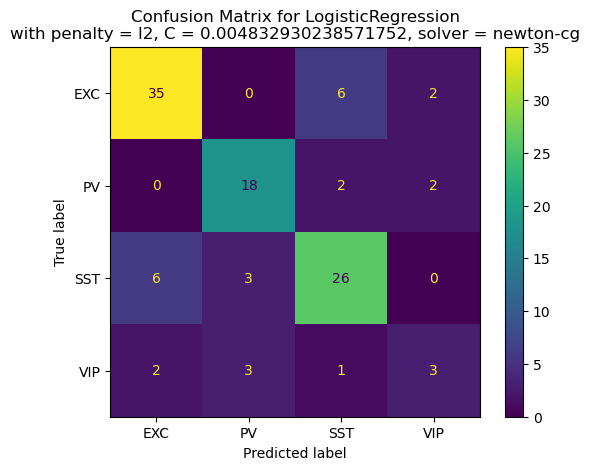

For (penalty=l2, C=0.004832930238571752, solver=lbfgs) - train, test score: 	 0.73413 	-	 0.75229
Classification Report:
              precision    recall  f1-score   support

         EXC       0.81      0.81      0.81        43
          PV       0.75      0.82      0.78        22
         SST       0.74      0.74      0.74        35
         VIP       0.43      0.33      0.38         9

    accuracy                           0.75       109
   macro avg       0.68      0.68      0.68       109
weighted avg       0.75      0.75      0.75       109



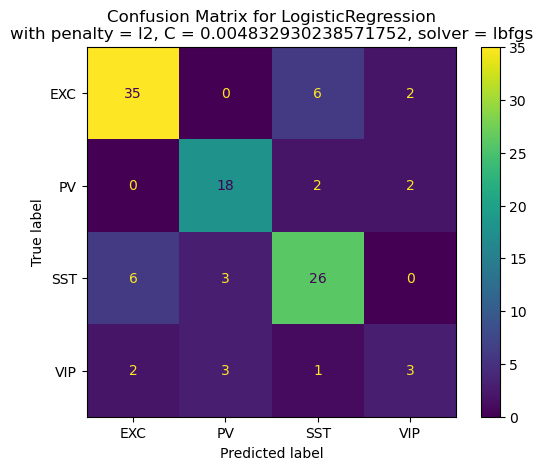

For (penalty=l2, C=0.012742749857031334, solver=lbfgs) - train, test score: 	 0.73810 	-	 0.75229
Classification Report:
              precision    recall  f1-score   support

         EXC       0.83      0.81      0.82        43
          PV       0.75      0.82      0.78        22
         SST       0.72      0.74      0.73        35
         VIP       0.43      0.33      0.38         9

    accuracy                           0.75       109
   macro avg       0.68      0.68      0.68       109
weighted avg       0.75      0.75      0.75       109



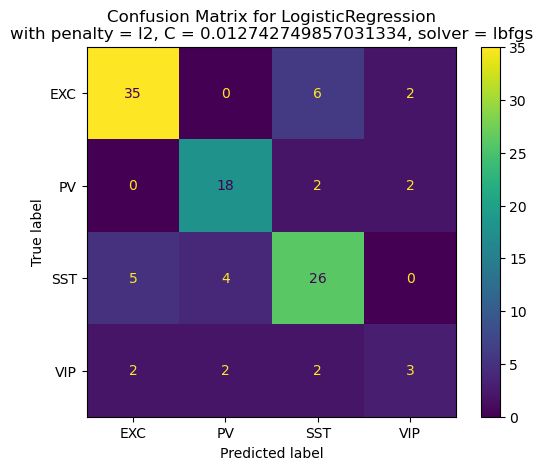

For (penalty=l2, C=0.03359818286283781, solver=lbfgs) - train, test score: 	 0.73810 	-	 0.75229
Classification Report:
              precision    recall  f1-score   support

         EXC       0.83      0.81      0.82        43
          PV       0.75      0.82      0.78        22
         SST       0.74      0.74      0.74        35
         VIP       0.38      0.33      0.35         9

    accuracy                           0.75       109
   macro avg       0.68      0.68      0.68       109
weighted avg       0.75      0.75      0.75       109



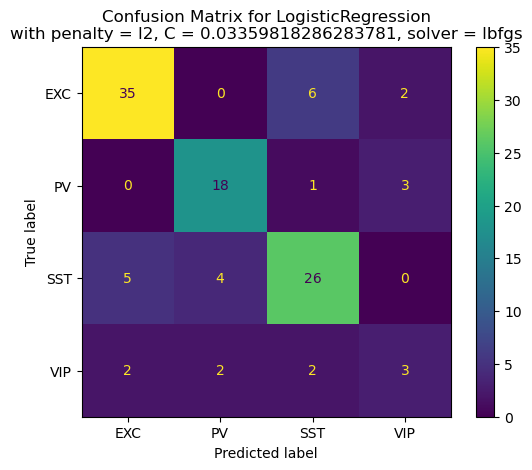

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the hyperparameters for LogisticRegression
LR_params = {
    'penalty': ['l1', 'l2', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

best_LR_test_score = 0
best_LR_params = {
    'penalty': [],
    'C': [],
    'solver': []
}
best_LR_clfs = []

# Loop over the hyperparameters
for p in LR_params['penalty']:
    for c in LR_params['C']:
        for s in LR_params['solver']:
            if p == 'l1' and s in ['newton-cg', 'lbfgs', 'sag']:
                continue
            if p == 'none' and s in ['liblinear']:
                continue
            if p == 'elasticnet' and s not in ['saga']:
                continue
            clf = LogisticRegression(penalty=p, C=c, solver=s, max_iter=10000)
            clf.fit(X_train, y_train)
            train_score = clf.score(X_train, y_train)
            test_score = clf.score(X_test, y_test)
            print("For (penalty={}, C={}, solver={}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(p, c, s, train_score, test_score))

            if test_score > best_LR_test_score:
                best_LR_test_score = test_score
                best_LR_params['penalty'] = [p]
                best_LR_params['C'] = [c]
                best_LR_params['solver'] = [s]
                best_LR_clfs = [clf]
            elif test_score == best_LR_test_score:
                best_LR_params['penalty'].append(p)
                best_LR_params['C'].append(c)
                best_LR_params['solver'].append(s)
                best_LR_clfs.append(clf)

print("--------------------------------------------------------")
print("Best test score: {:.5f}".format(best_LR_test_score))
for i in range(len(best_LR_params['penalty'])):
    p = best_LR_params['penalty'][i]
    c = best_LR_params['C'][i]
    s = best_LR_params['solver'][i]
    clf = best_LR_clfs[i]

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For (penalty={}, C={}, solver={}) - train, test score: \t {:.5f} \t-\t {:.5f}".format(p, c, s, train_score, test_score))

    # Predict the test set results
    y_pred = clf.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for LogisticRegression\nwith penalty = {p}, C = {c}, solver = {s}')
    plt.show()


For var_smoothing = 1.0 - train, test score: 	 0.43651 	-	 0.39450
For var_smoothing = 0.8111308307896871 - train, test score: 	 0.43651 	-	 0.39450
For var_smoothing = 0.657933224657568 - train, test score: 	 0.44444 	-	 0.41284
For var_smoothing = 0.533669923120631 - train, test score: 	 0.44048 	-	 0.41284
For var_smoothing = 0.43287612810830584 - train, test score: 	 0.44048 	-	 0.43119
For var_smoothing = 0.3511191734215131 - train, test score: 	 0.45238 	-	 0.43119
For var_smoothing = 0.2848035868435802 - train, test score: 	 0.46825 	-	 0.43119
For var_smoothing = 0.23101297000831597 - train, test score: 	 0.48016 	-	 0.44037
For var_smoothing = 0.1873817422860384 - train, test score: 	 0.48810 	-	 0.45872
For var_smoothing = 0.15199110829529336 - train, test score: 	 0.50000 	-	 0.46789
For var_smoothing = 0.12328467394420659 - train, test score: 	 0.50794 	-	 0.47706
For var_smoothing = 0.1 - train, test score: 	 0.51587 	-	 0.48624
For var_smoothing = 0.08111308307896872 - tr

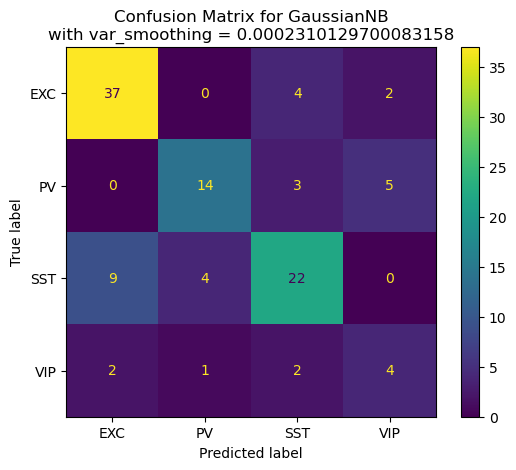

For var_smoothing = 0.0001873817422860383 - train, test score: 	 0.69841 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.74      0.64      0.68        22
         SST       0.71      0.63      0.67        35
         VIP       0.36      0.44      0.40         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.71      0.71      0.71       109



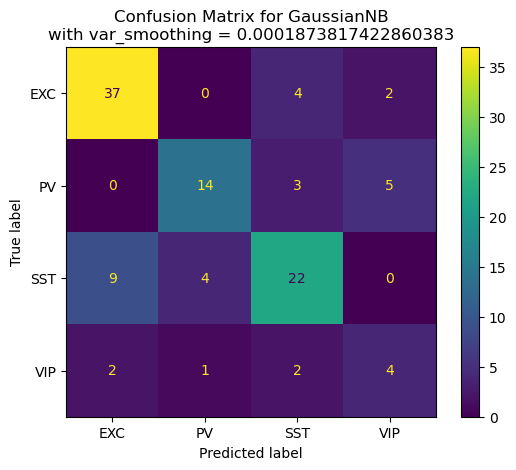

For var_smoothing = 0.0001519911082952933 - train, test score: 	 0.70238 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.74      0.64      0.68        22
         SST       0.71      0.63      0.67        35
         VIP       0.36      0.44      0.40         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.71      0.71      0.71       109



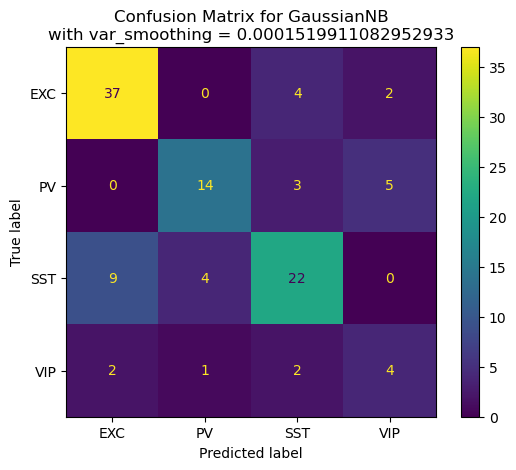

For var_smoothing = 0.0001232846739442066 - train, test score: 	 0.70238 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.74      0.64      0.68        22
         SST       0.71      0.63      0.67        35
         VIP       0.36      0.44      0.40         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.71      0.71      0.71       109



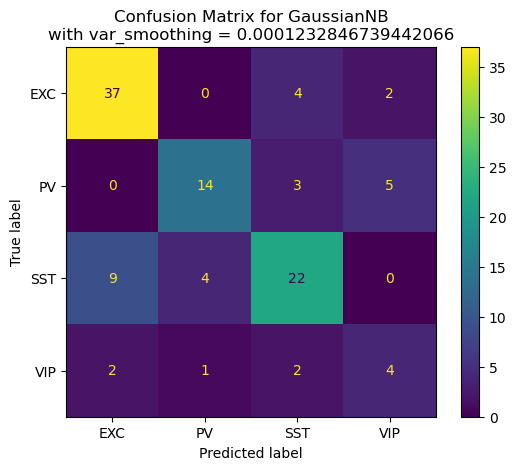

For var_smoothing = 0.0001 - train, test score: 	 0.70238 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



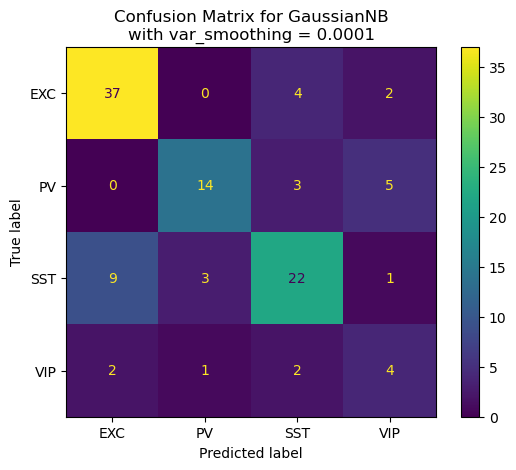

For var_smoothing = 8.111308307896872e-05 - train, test score: 	 0.70238 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



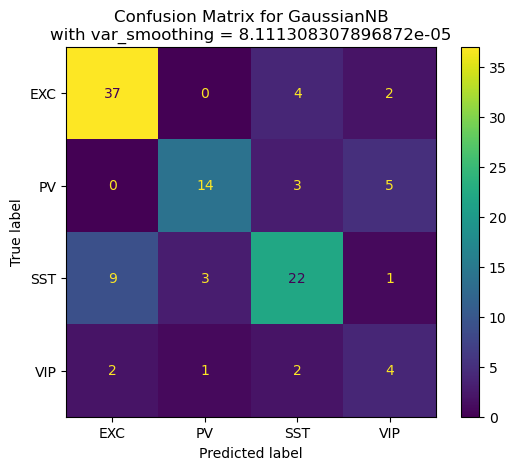

For var_smoothing = 6.579332246575683e-05 - train, test score: 	 0.69841 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



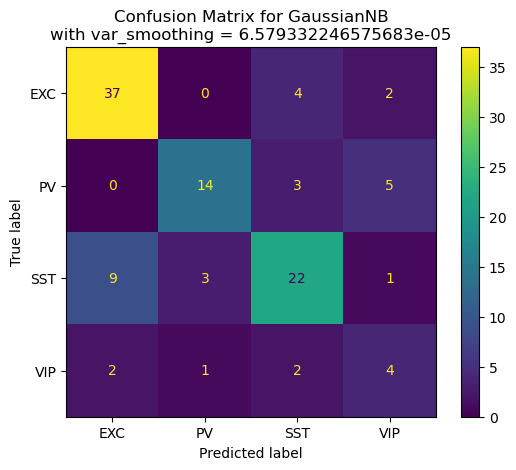

For var_smoothing = 5.3366992312063123e-05 - train, test score: 	 0.69841 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



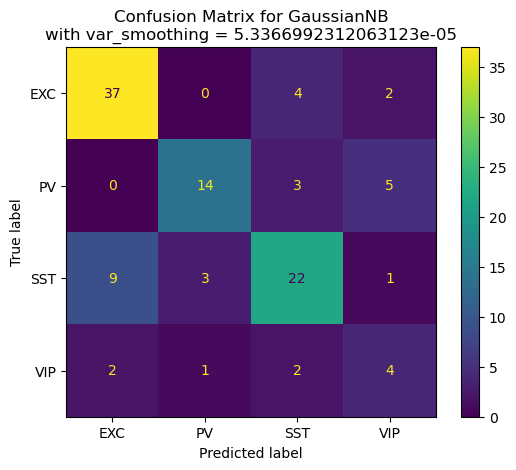

For var_smoothing = 4.328761281083062e-05 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



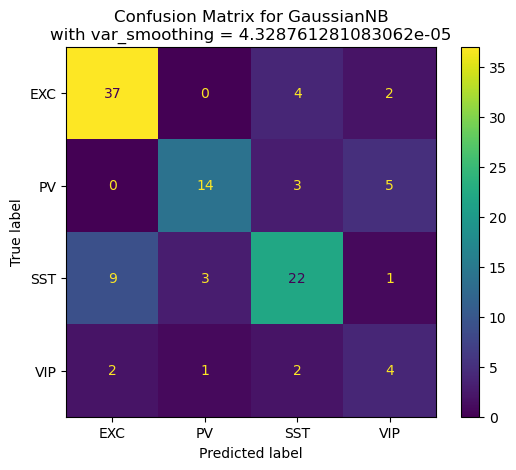

For var_smoothing = 3.511191734215127e-05 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



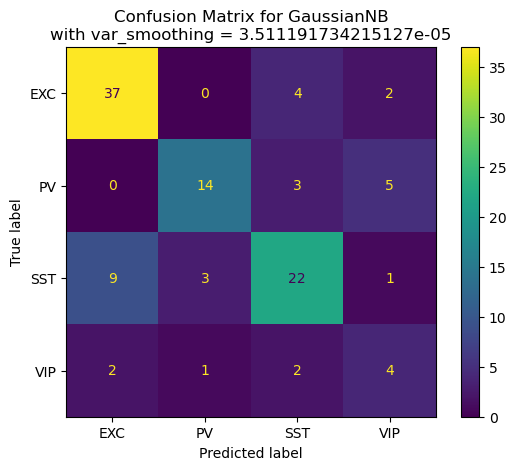

For var_smoothing = 2.848035868435799e-05 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



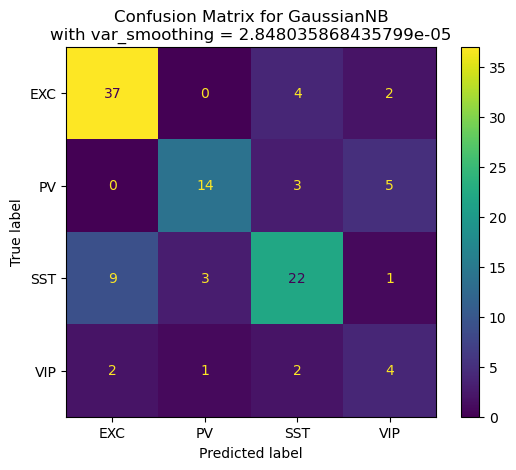

For var_smoothing = 2.310129700083158e-05 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



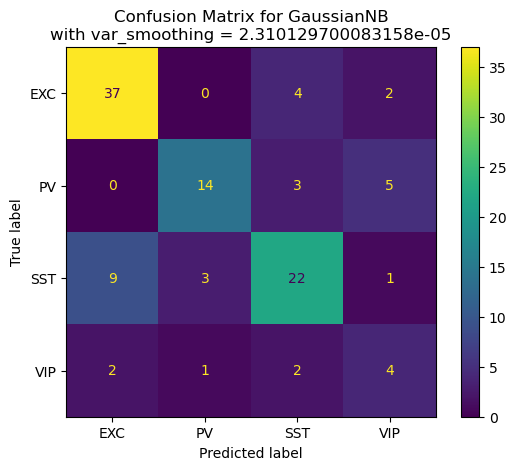

For var_smoothing = 1.873817422860383e-05 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



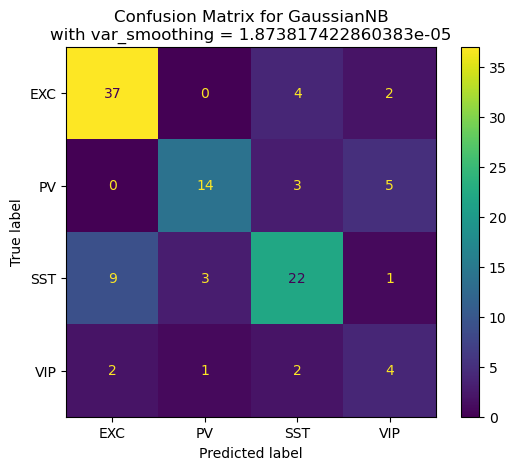

For var_smoothing = 1.5199110829529332e-05 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



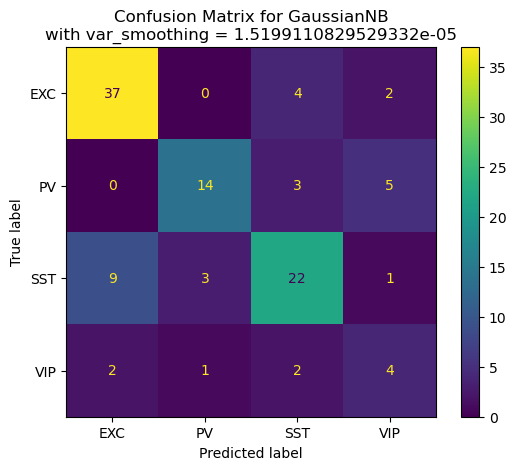

For var_smoothing = 1.2328467394420658e-05 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



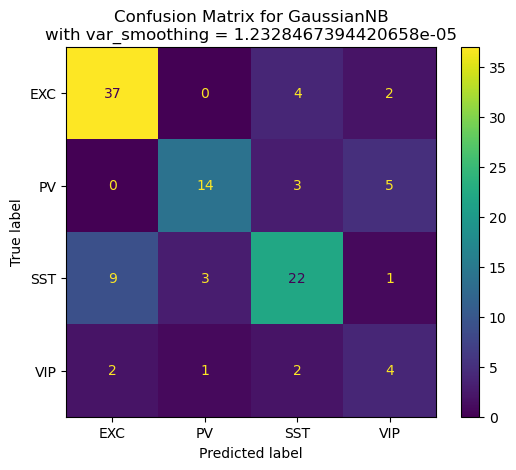

For var_smoothing = 1e-05 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



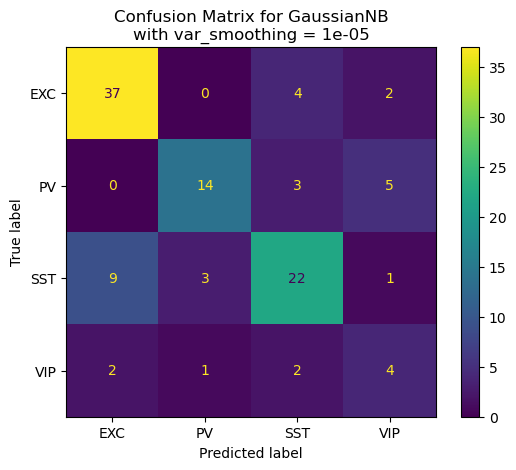

For var_smoothing = 8.111308307896873e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



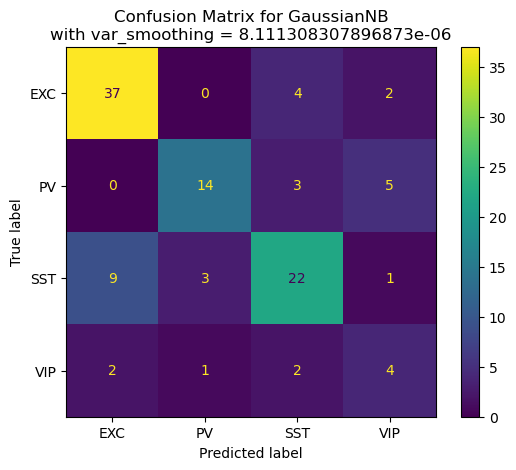

For var_smoothing = 6.579332246575683e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



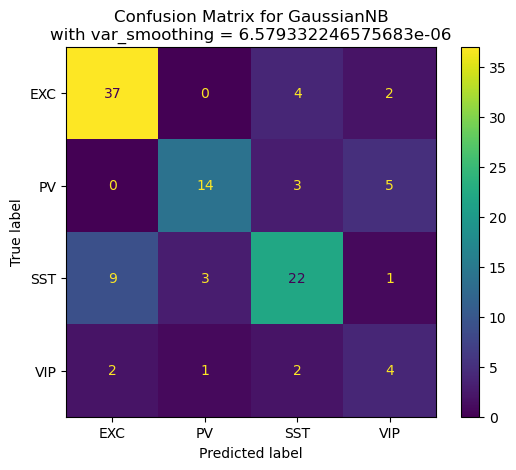

For var_smoothing = 5.336699231206313e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



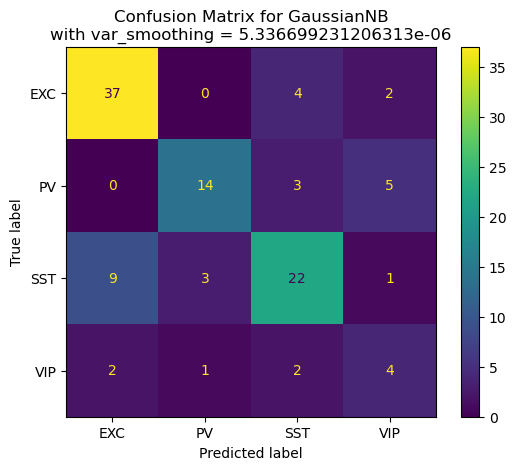

For var_smoothing = 4.328761281083053e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



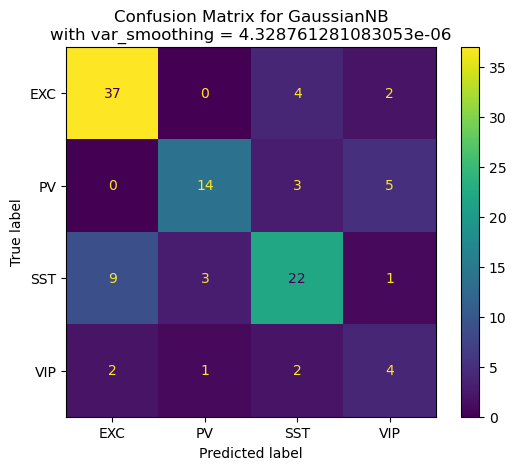

For var_smoothing = 3.5111917342151275e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



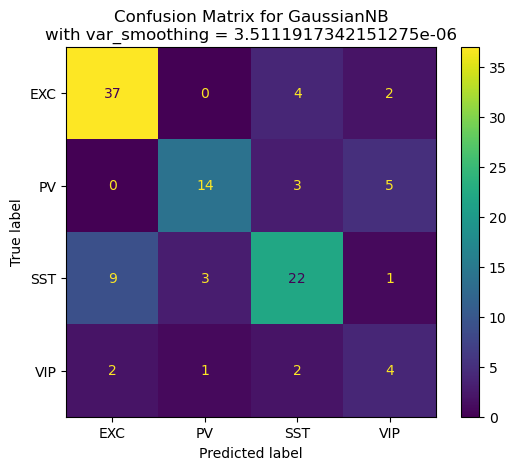

For var_smoothing = 2.848035868435799e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



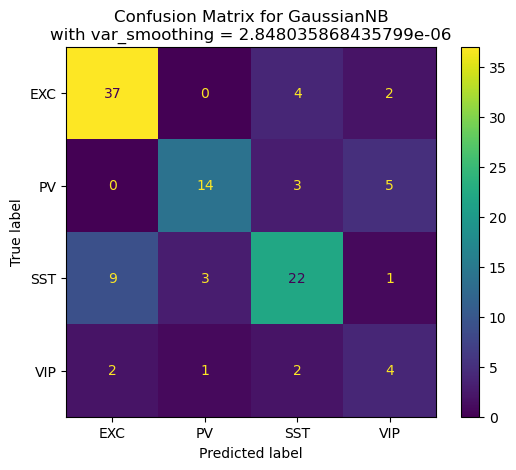

For var_smoothing = 2.310129700083158e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



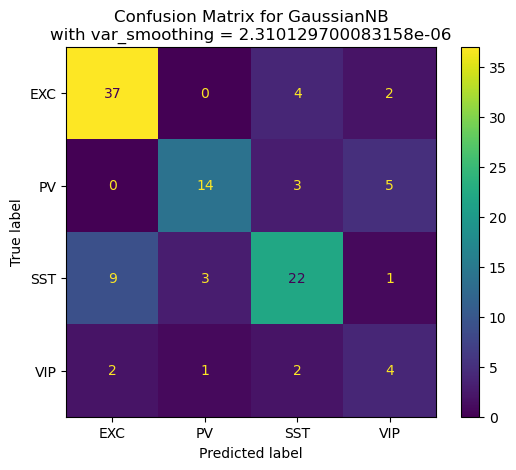

For var_smoothing = 1.873817422860383e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



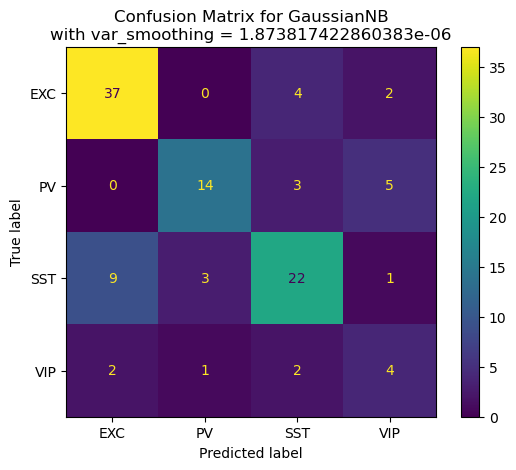

For var_smoothing = 1.519911082952933e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



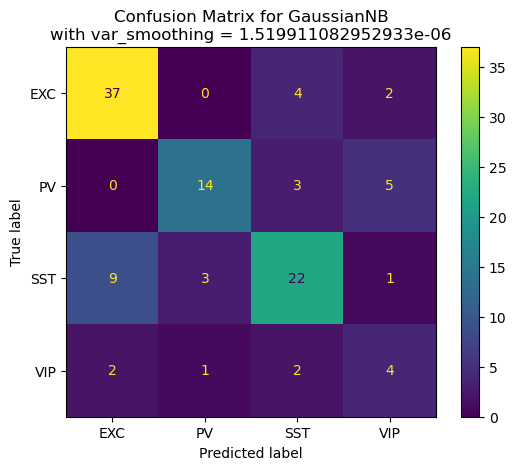

For var_smoothing = 1.232846739442066e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



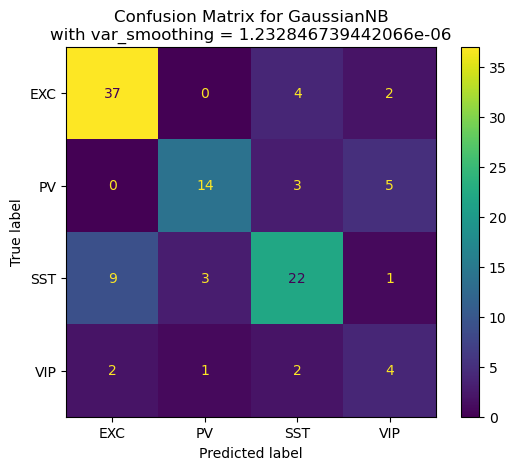

For var_smoothing = 1e-06 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



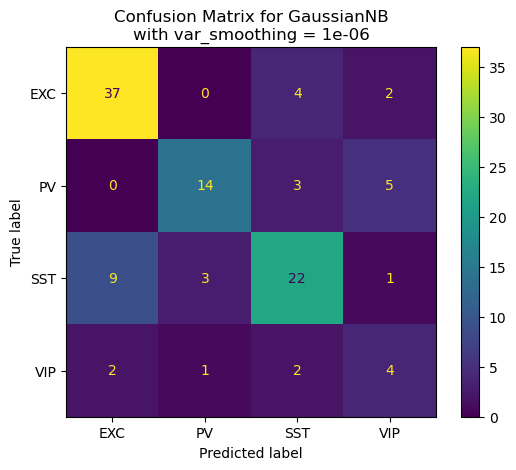

For var_smoothing = 8.111308307896872e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



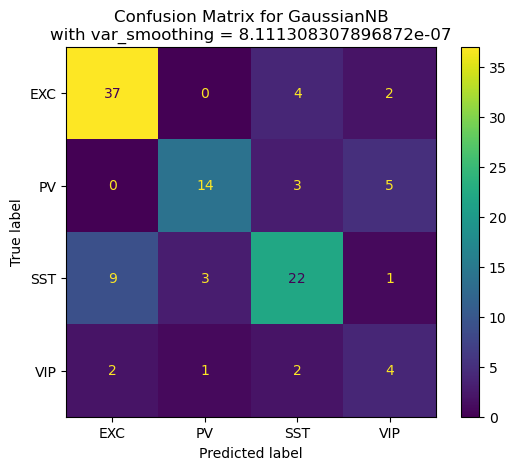

For var_smoothing = 6.579332246575682e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



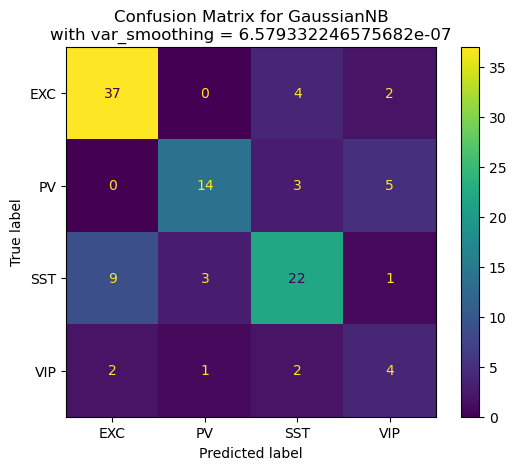

For var_smoothing = 5.336699231206313e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



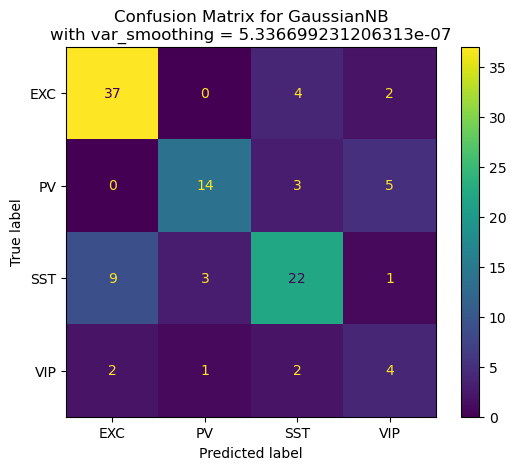

For var_smoothing = 4.3287612810830526e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



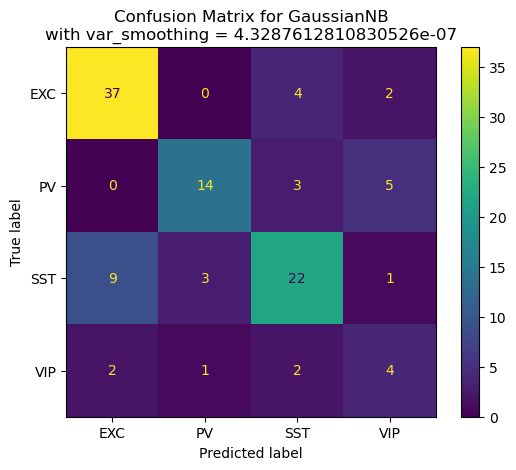

For var_smoothing = 3.5111917342151277e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



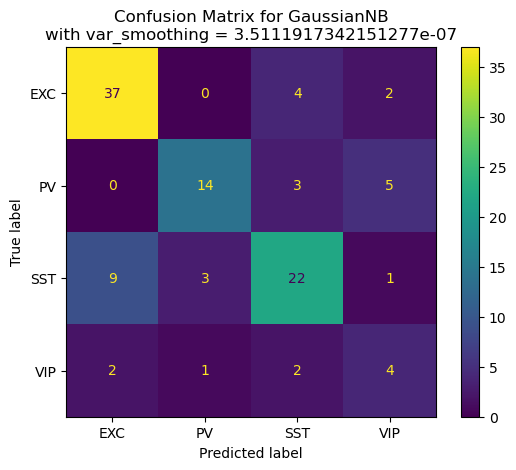

For var_smoothing = 2.848035868435799e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



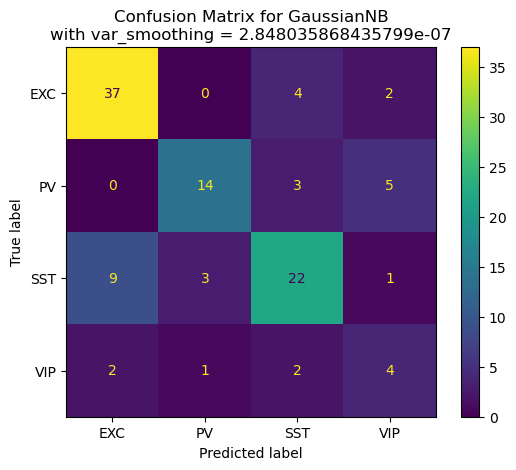

For var_smoothing = 2.310129700083158e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



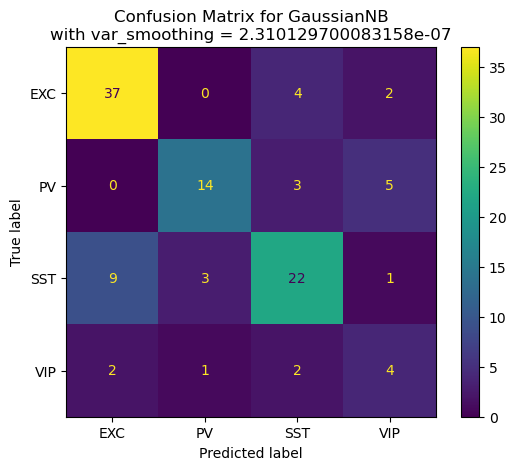

For var_smoothing = 1.873817422860383e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



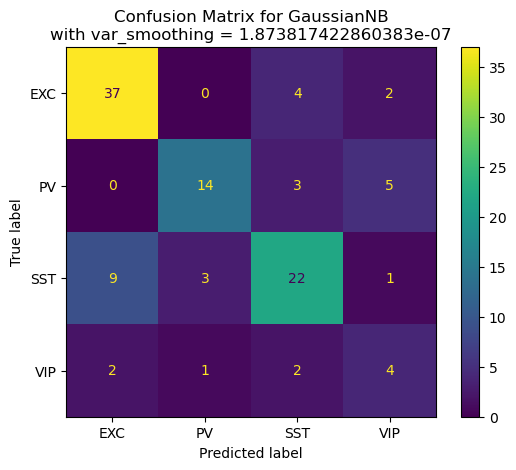

For var_smoothing = 1.519911082952933e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



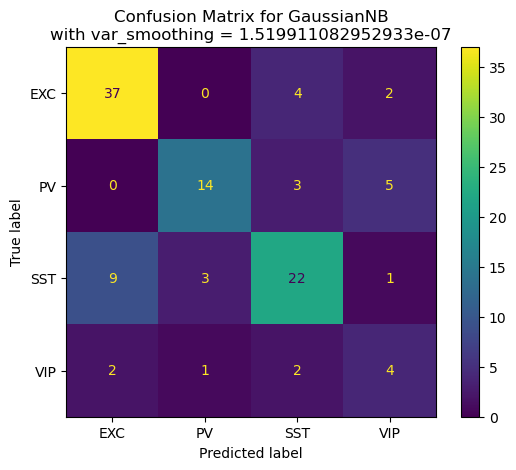

For var_smoothing = 1.232846739442066e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



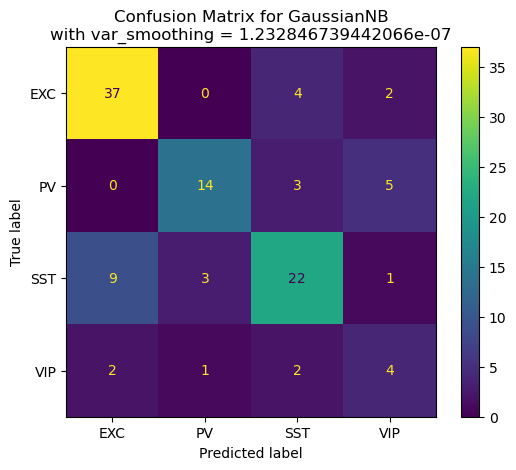

For var_smoothing = 1e-07 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



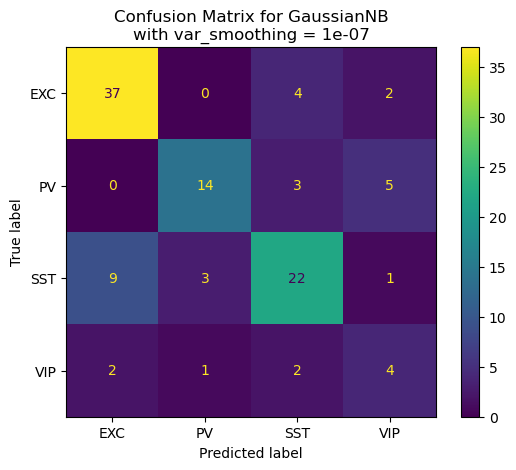

For var_smoothing = 8.111308307896873e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



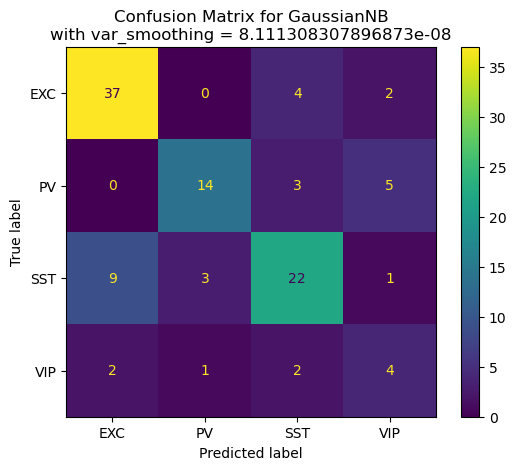

For var_smoothing = 6.579332246575682e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



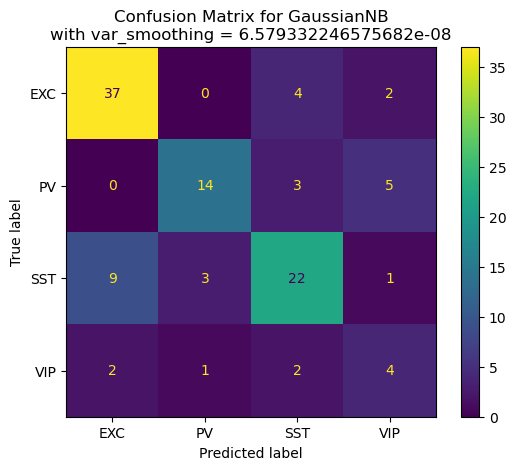

For var_smoothing = 5.336699231206302e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



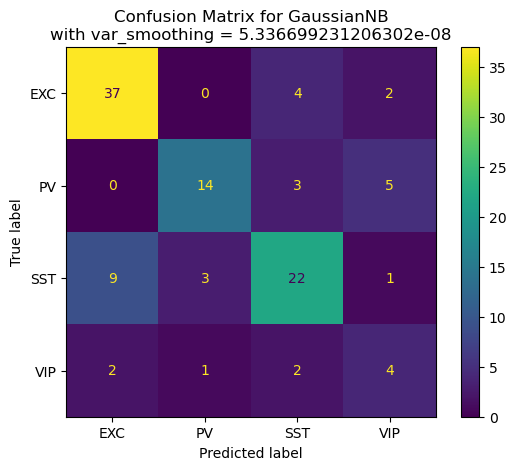

For var_smoothing = 4.3287612810830526e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



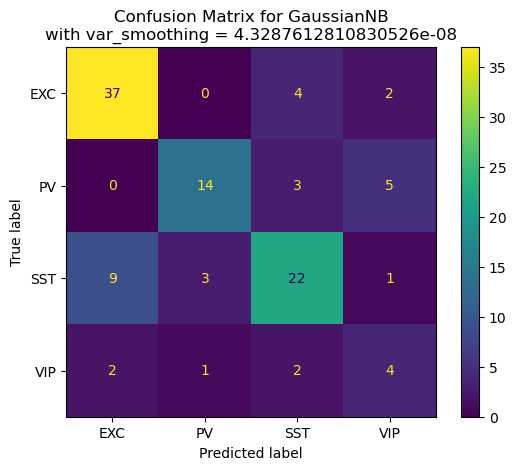

For var_smoothing = 3.5111917342151277e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



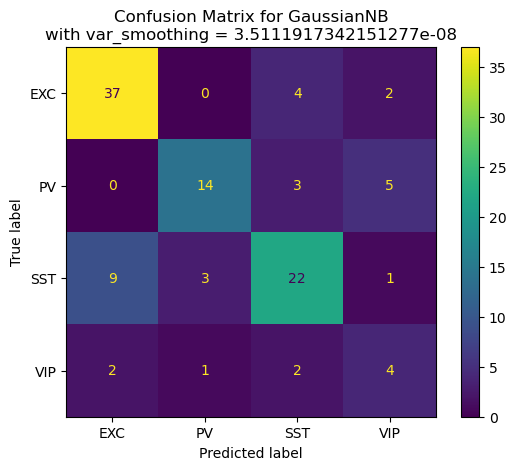

For var_smoothing = 2.848035868435799e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



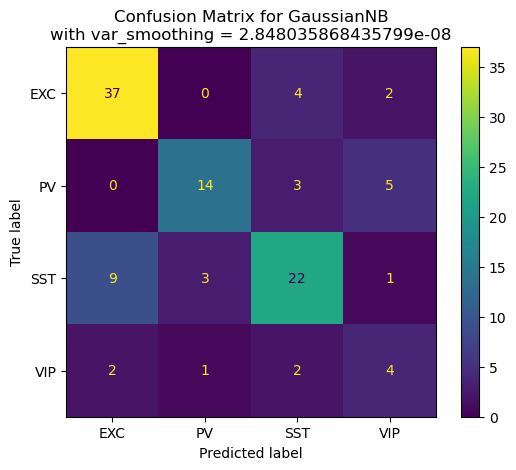

For var_smoothing = 2.310129700083158e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



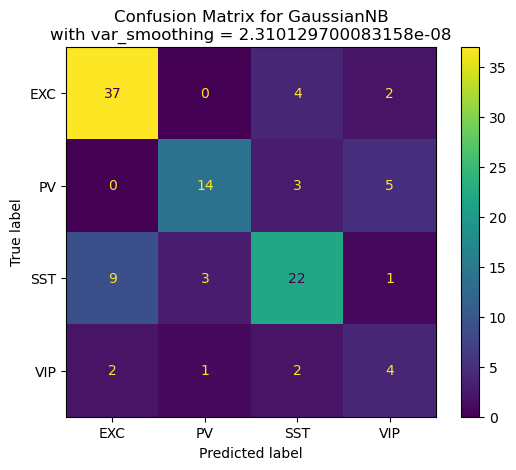

For var_smoothing = 1.873817422860383e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



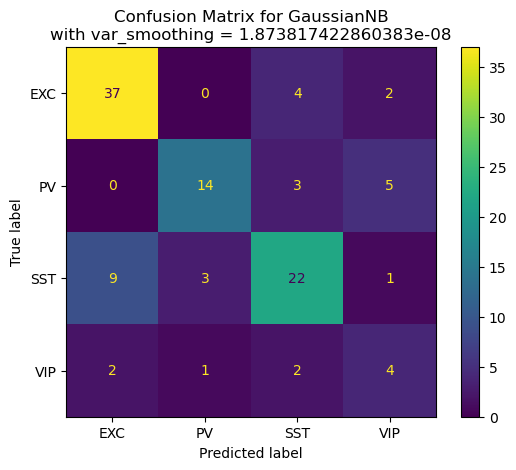

For var_smoothing = 1.519911082952933e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



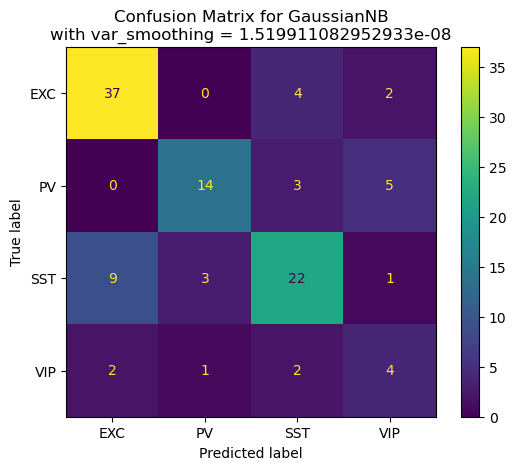

For var_smoothing = 1.232846739442066e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



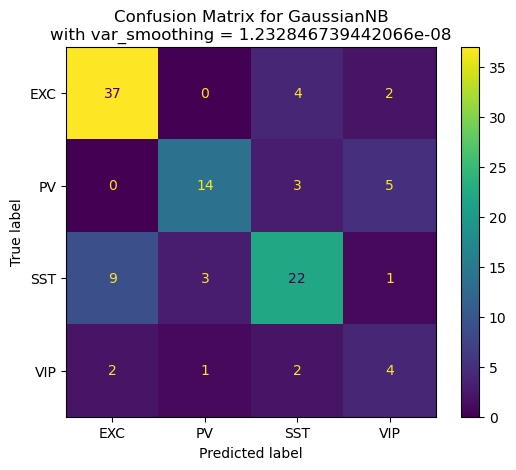

For var_smoothing = 1e-08 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



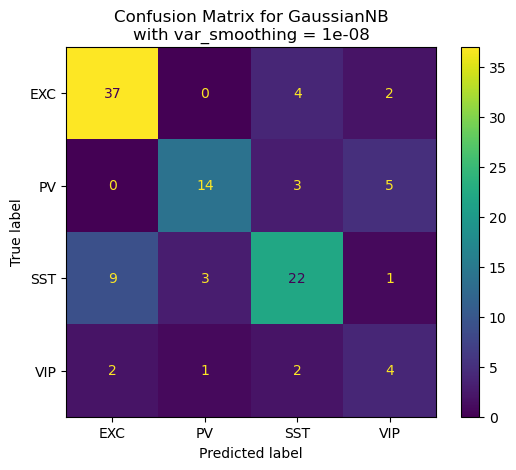

For var_smoothing = 8.111308307896856e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



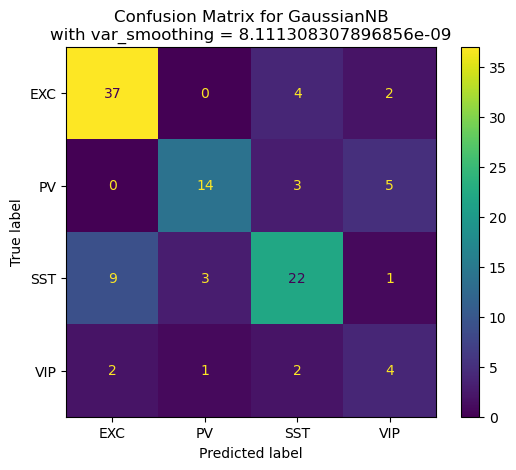

For var_smoothing = 6.579332246575682e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



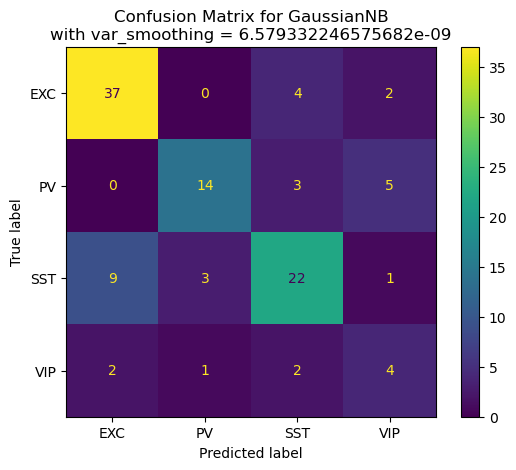

For var_smoothing = 5.336699231206302e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



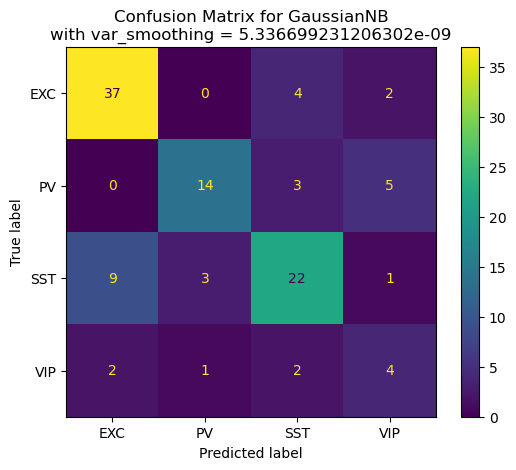

For var_smoothing = 4.328761281083061e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



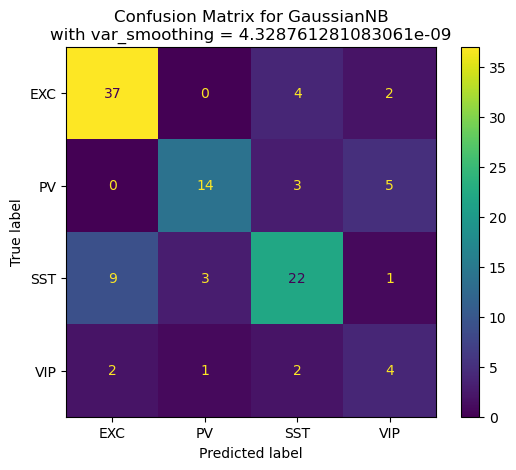

For var_smoothing = 3.5111917342151273e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



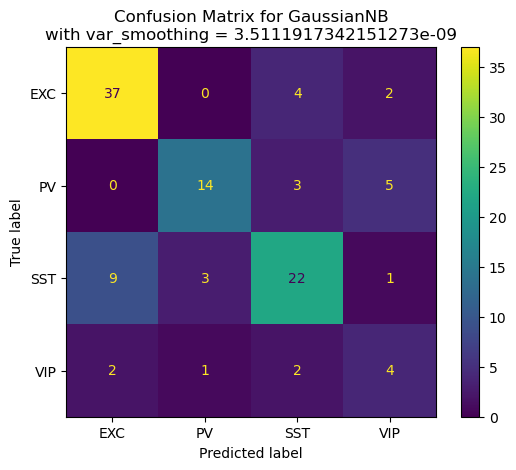

For var_smoothing = 2.848035868435805e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



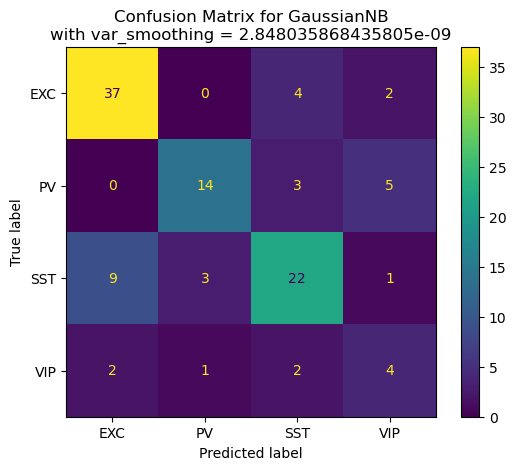

For var_smoothing = 2.310129700083158e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



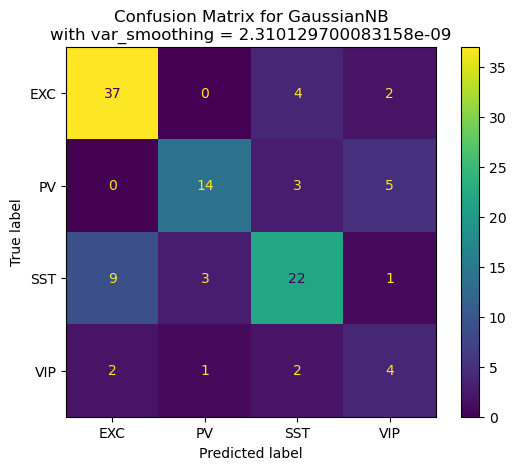

For var_smoothing = 1.873817422860387e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



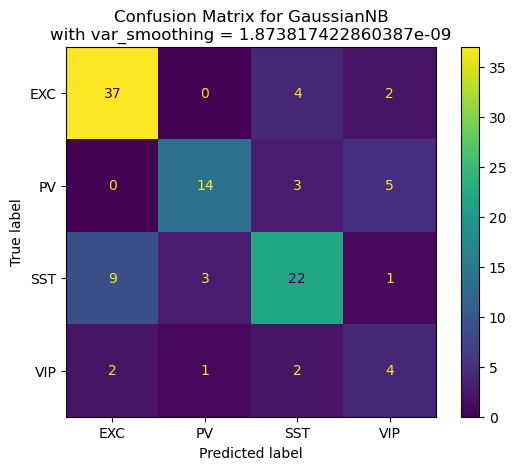

For var_smoothing = 1.519911082952933e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



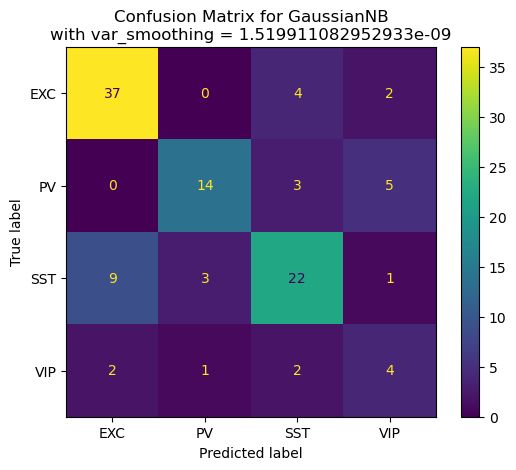

For var_smoothing = 1.2328467394420635e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



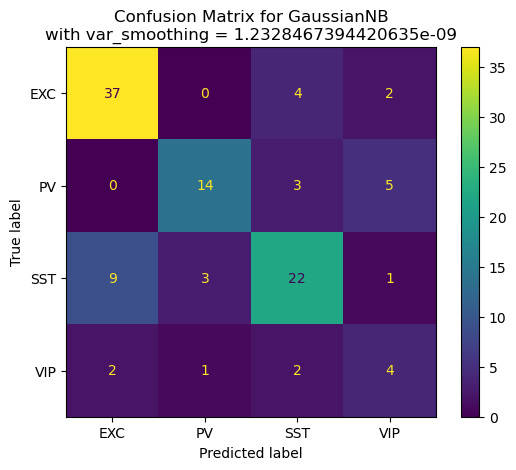

For var_smoothing = 1e-09 - train, test score: 	 0.69444 	-	 0.70642
Classification Report:
              precision    recall  f1-score   support

         EXC       0.77      0.86      0.81        43
          PV       0.78      0.64      0.70        22
         SST       0.71      0.63      0.67        35
         VIP       0.33      0.44      0.38         9

    accuracy                           0.71       109
   macro avg       0.65      0.64      0.64       109
weighted avg       0.72      0.71      0.71       109



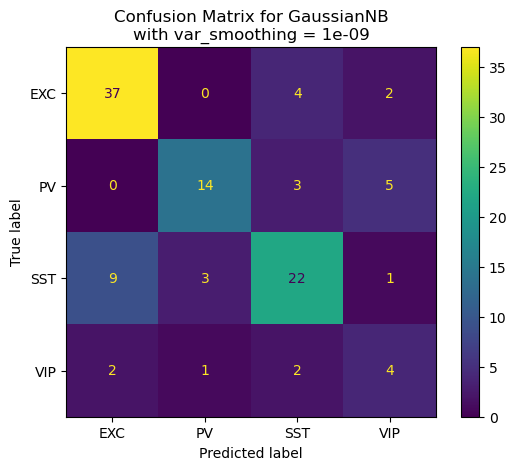

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the hyperparameters for GaussianNB
GNB_params = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

best_GNB_test_score = 0
best_GNB_params = {
    'var_smoothing': []
}
best_GNB_clfs = []

# Loop over the hyperparameters
for vs in GNB_params['var_smoothing']:
    clf = GaussianNB(var_smoothing=vs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For var_smoothing = {} - train, test score: \t {:.5f} \t-\t {:.5f}".format(vs, train_score, test_score))

    if test_score > best_GNB_test_score:
        best_GNB_test_score = test_score
        best_GNB_params['var_smoothing'] = [vs]
        best_GNB_clfs = [clf]
    elif test_score == best_GNB_test_score:
        best_GNB_params['var_smoothing'].append(vs)
        best_GNB_clfs.append(clf)

print("--------------------------------------------------------")
print("Best test score: {:.5f}".format(best_GNB_test_score))
for i in range(len(best_GNB_params['var_smoothing'])):
    vs = best_GNB_params['var_smoothing'][i]
    clf = best_GNB_clfs[i]

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    print("For var_smoothing = {} - train, test score: \t {:.5f} \t-\t {:.5f}".format(vs, train_score, test_score))

    # Predict the test set results
    y_pred = clf.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(cm, display_labels=clf.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for GaussianNB\nwith var_smoothing = {vs}')
    plt.show()
